# Adapting Infection Spread Model

### Modeling infection spread using SIR model

In [31]:
import numpy as np

def SIR_model(S0, I0, R0, beta, gamma, days):
    dtype = [('day', int), ('susceptible', float), ('infected', float), ('recovered', float)]
    #Initialize arrays
    data = np.zeros(days, dtype=dtype)
    data['day'] = np.arange(days)
    data['susceptible'][0] = S0
    data['infected'][0] = I0
    data['recovered'][0] = R0
    
    #Total population
    N = S0 + I0 + R0 

    #Calculate values
    for t in range(1, days):
        data['susceptible'][t] = data['susceptible'][t-1] - beta * data['susceptible'][t-1] * data['infected'][t-1] / N
        data['infected'][t] = data['infected'][t-1] + beta * data['susceptible'][t-1] * data['infected'][t-1] / N - gamma * data['infected'][t-1]
        data['recovered'][t] = data['recovered'][t-1] + gamma * data['infected'][t-1]

    return data

# --------------------------
# Main Program
# --------------------------

# Initial values
S0 = 990 #Number of susceptible individuals
I0 = 10 #Number of infected individuals
R0 = 0 #Number of recovered individuals
beta = 0.3 #infection rate
gamma = 0.1 #recovery rate
days = 160 #Number of days to simulate

SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)

#print("\nSusceptible:\n", SIR_data['susceptible'])
#print("\nInfected:\n", SIR_data['infected'])
#print("\nRecovered:\n", SIR_data['recovered'])



#### Monte Carlo Simulation

In [32]:
# Monte Carlo simulation to estimate the impact of random initial infected
def monte_carlo_simulation(S0, I0_range, R0, beta, gamma, days, num_simulations):

    final_infected = np.zeros(num_simulations)

    for i in range(num_simulations):
        # Randomize the initial number of infected individuals within the specified range
        I0 = np.random.randint(I0_range[0], I0_range[1])
        
        # Run the SIR model
        SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)
        
        # Store the final number of infected individuals
        final_infected[i] = SIR_data['infected'][-1]
    
    return final_infected

S0 = 990
I0_range = (5, 15)
R0 = 0
beta = 0.3
gamma = 0.1
days = 160
num_simulations = 100

# Run Monte Carlo Simulation
final_infected_results = monte_carlo_simulation(S0, I0_range, R0, beta, gamma, days, num_simulations)
#print("Final infected individuals form each simulation\n: ", final_infected_results)

# Analyze the results
mean_final_infected = np.mean(final_infected_results)
std_final_infected = np.std(final_infected_results)

#print(f"\nMean final number of infected individuals: {mean_final_infected}")
#print(f"\nStandard deviation of final number of infected individuals: {std_final_infected}")

### Line Plots of SIR Model Dynamics

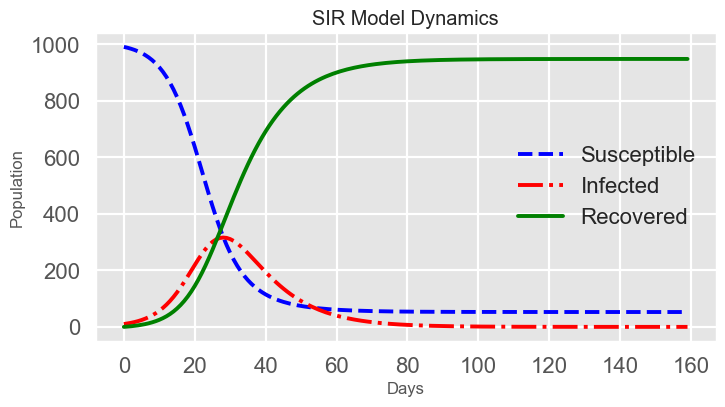

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


plt.figure(figsize=(8,4))
plt.plot(SIR_data['day'], SIR_data['susceptible'], '--b', label='Susceptible')
plt.plot(SIR_data['day'], SIR_data['infected'], '-.', label='Infected', color='red')
plt.plot(SIR_data['day'], SIR_data['recovered'], label='Recovered', color='green')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Dynamics')
plt.legend();


### Scatter Plot of Final Infected Individuals from Monte Carlo Simulation

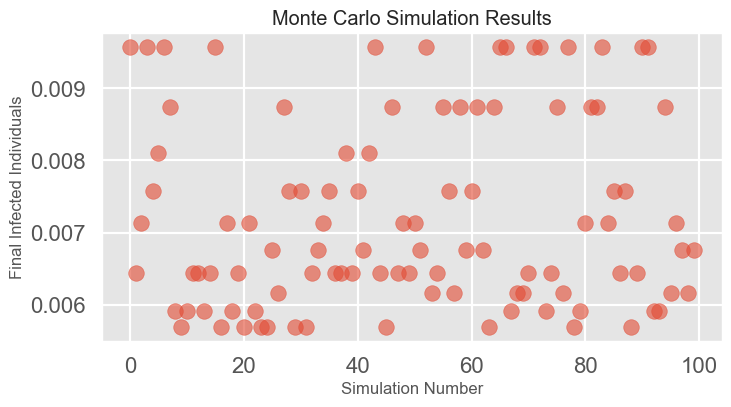

In [35]:
plt.figure(figsize=(8,4))
plt.scatter(range(num_simulations), final_infected_results, alpha=0.6)
plt.xlabel('Simulation Number')
plt.ylabel("Final Infected Individuals")
plt.title('Monte Carlo Simulation Results');

### Histogram of Final Infected Individuals from Monte Carlo Simulation

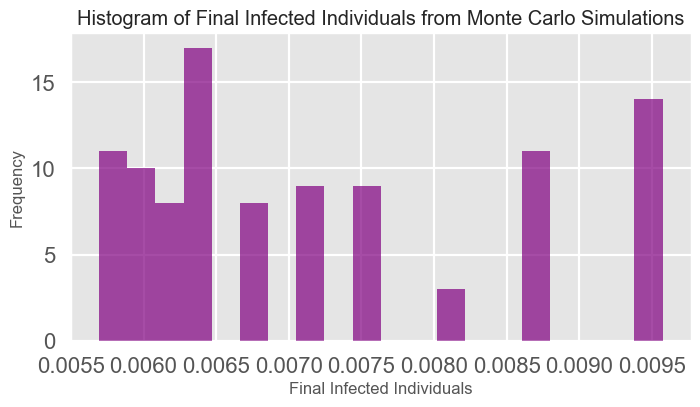

In [37]:
plt.figure(figsize=(8,4))
plt.hist(final_infected_results, bins=20, color='purple', alpha=0.7)
plt.xlabel('Final Infected Individuals')
plt.ylabel('Frequency')
plt.title('Histogram of Final Infected Individuals from Monte Carlo Simulations');